Inspecting data from a manual inhibition paradigm

Clara Kuper, January 2021

In this task, one obeserver made radip hand movements from one point to another. In half of the trials, the upper and lower third of the screen turned white for 33ms. This "flash" occured 80-130 ms before the mean reaction time. This delay is known to elicit saccadic inhibition (a dip in the distribution of saccadic reaction times). We want to see if the same is true fo manual responses.

In this notebook, I will:

1. Load the data from the experiment
2. Look at the reaction time distributions from flash and no-flash conditions
3. Clean the reaction time data
4. Align the reaction times to the onset of the flash and check again for the distribution
5. Compare the flash and no flash condition statistically
6. Compare movement durations in flash and no-flash trials
7. Compare the end point of movements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

all_dat_des = []
# import all data
for s in ['ck11', 'jk01']:
    data_s = pd.read_csv('../1_Data/{}_MI_dat.csv'.format(s))
    data_s['subject'] = s
    design_s = pd.read_csv('../1_Design/{}_MI_des.csv'.format(s))
    # there are small differences between these data sets, so we need to kick out some lines
    if s == 'jk01':
        design_s.drop(['tar3yPos', 'tar3xPos', 'shift'], axis = 1, inplace = True)
    
    # some columns that appear twice are dropped
    design_s.drop(['gapDur'], axis =1, inplace = True)
    # the values in "design" are sorted according to the id, and the index is reset
    design_s.sort_values(['id'], inplace = True)
    design_s.reset_index(drop = True, inplace = True)
    # data and design fies are merged into one file
    dat_des_s = pd.concat([data_s, design_s], axis = 1)
    all_dat_des.append(dat_des_s)

# combine everything in one dataframe
data_2t_10deg_em = pd.concat(all_dat_des, axis = 0).reset_index(drop = True)

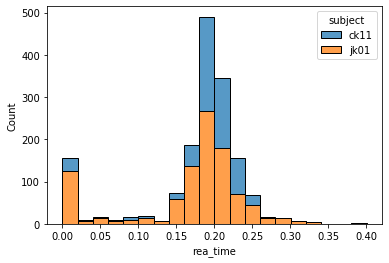

In [2]:
# initialize the data set we will work with
data = data_2t_10deg_em.copy()

# plot the basic distribution of reaction times
# now, we will always plot for two subjects
sns.histplot(data = data, x = 'rea_time', hue = 'subject', multiple = "stack", binwidth = 0.02);

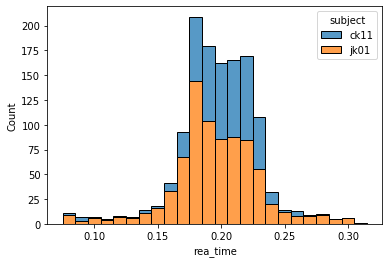

In [3]:
# clean the dataset: remove all time trials where the reaction time is larger or smaller than 2 std
# also, remove all unsuccessful trials
# get standart deviation
rea_std = np.std(data.rea_time)

# get std as variation from mean
rea_cut_high = np.mean(data.rea_time) + 2* rea_std
rea_cut_low = np.mean(data.rea_time) - 2* rea_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.rea_time >= rea_cut_high) | (data.rea_time <= rea_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# delete rows with unsuccessful trials
df = df.drop(np.where(df.success ==0)[0])
sns.histplot(data = df, x = 'rea_time', hue = 'subject', multiple = "stack", binwidth = 0.01);

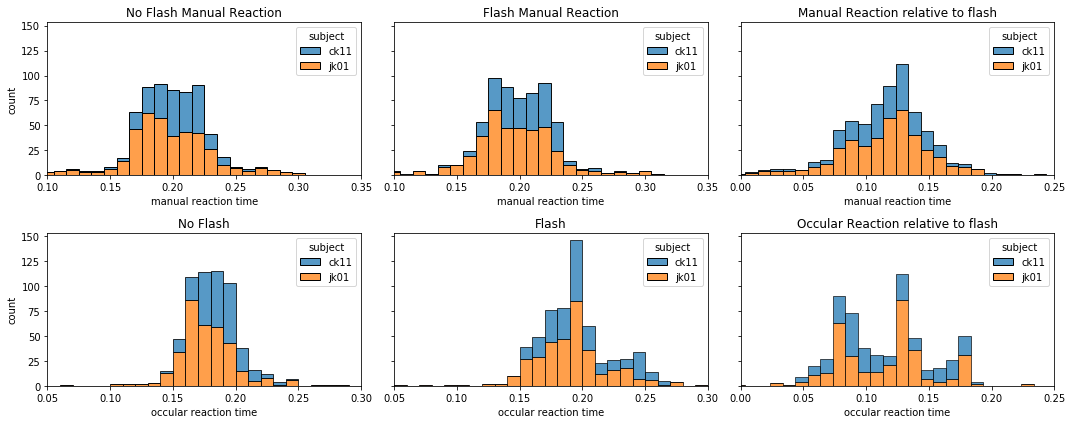

In [4]:
# plot reaction times of flash - and no-flash trials seperately
fig1, axs1 = plt.subplots(2,3, figsize  = (15,6), sharey = True)
#fig1.suptitle('Two Dot Version 10 deg, 110 ms flash delay')
# manual reaction times no flash
sns.histplot(data = df[df.flash == 0], x = 'rea_time', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[0,0]);
#axs1[0,0].hist(df[df.flash == 0]['rea_time'], bins = 20, color = 'orange')
axs1[0,0].set_xlim(0.1,0.35)
axs1[0,0].set_xlabel('manual reaction time')
axs1[0,0].set_ylabel('count')
axs1[0,0].set_title('No Flash Manual Reaction')
# manual reaction times flash
sns.histplot(data = df[df.flash == 1], x = 'rea_time', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[0,1]);
#axs1[0,1].hist(df[df.flash == 1]['rea_time'], bins = 20, color = 'orange')
axs1[0,1].set_xlim(0.1,0.35)
axs1[0,1].set_xlabel('manual reaction time')
axs1[0,1].set_title('Flash Manual Reaction')
# manual reaction times relative to flash
df['flash_movement'] = df.t_movStart - df.t_flash
sns.histplot(data = df[df.flash == 1], x = 'flash_movement', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[0,2]);
#axs1[0,2].hist(df.flash_movement[df.flash == 1], bins =20, color = 'orange')
axs1[0,2].set_xlim(0.0,0.25)
axs1[0,2].set_xlabel('manual reaction time')
axs1[0,2].set_title('Manual Reaction relative to flash')


# The same thing for eye movements
# occular reaction times no flash
sns.histplot(data = df[df.flash == 0], x = 'sacc_rea', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[1,0]);
#axs1[1,0].hist(df[df.flash == 0]['sacc_rea'], bins = 20, color = 'green')
axs1[1,0].set_xlim(0.05,0.3)
axs1[1,0].set_xlabel('occular reaction time')
axs1[1,0].set_ylabel('count')
axs1[1,0].set_title('No Flash')
# occular reaction times flash
#axs1[1,1].hist(df[df.flash == 1]['sacc_rea'], bins = 20, color = 'green')
sns.histplot(data = df[df.flash == 1], x = 'sacc_rea', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[1,1]);
axs1[1,1].set_xlim(0.05,0.3)
axs1[1,1].set_xlabel('occular reaction time')
axs1[1,1].set_title('Flash')
# manual reaction times relative to flash
df['flash_saccade'] = df.t_saccStart - df.t_flash
sns.histplot(data = df[df.flash == 1], x = 'flash_saccade', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs1[1,2]);
#axs1[1,2].hist(df.flash_saccade[df.flash == 1], bins =20, color = 'green')
axs1[1,2].set_xlim(0.0,0.25)
axs1[1,2].set_xlabel('occular reaction time')
axs1[1,2].set_title('Occular Reaction relative to flash')
plt.tight_layout()

plt.savefig('../3_Figures/2Dot_10deg_110ms_Saccades_Hands.png')

In [5]:
# because we've seen above that the flash appeared roughly when we expected it to appear, 
# we can compute the timing of an "invisible" flash in no-flash trials
# this was done online for jk, we only need to do that for ck here
df.loc[np.isnan(df.t_flash),'t_flash'] = df[np.isnan(df.t_flash)]['t2_draw'] + df[np.isnan(df.t_flash)]['gapDur'] 

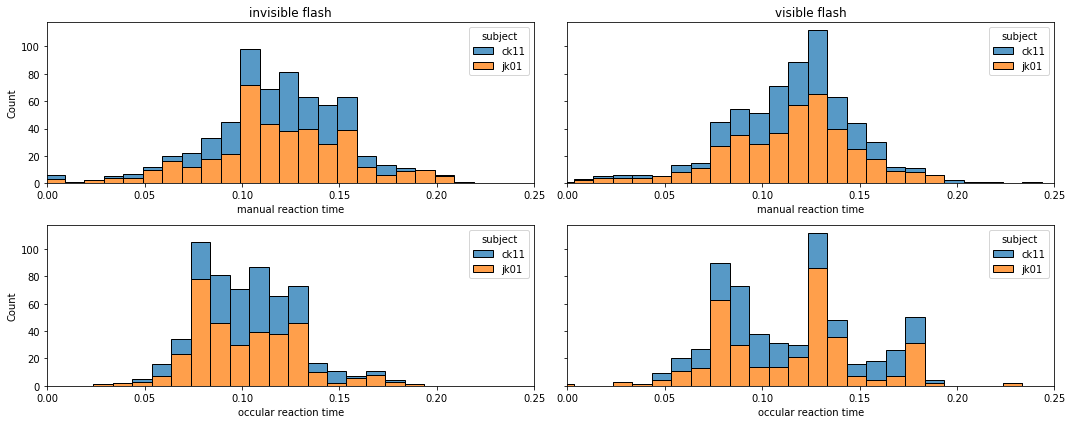

In [6]:
# Now that we have flash time in both cases, we can also compare flash and no-flash trials flash-locked
fig2, axs2 = plt.subplots(2,2, figsize  = (15,6), sharey = True)

# manual reaction times no flash
# manual reaction times relative to flash
df['flash_movement'] = df.t_movStart - df.t_flash
sns.histplot(data = df[df.flash == 0], x = 'flash_movement', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs2[0,0]);
#axs2[0,0].hist(df.flash_movement[df.flash == 0], bins =20, color = 'orange')
axs2[0,0].set_xlim(0.0,0.25)
axs2[0,0].set_xlabel('manual reaction time')
axs2[0,0].set_title('invisible flash')

# manual reaction times flash
sns.histplot(data = df[df.flash == 1], x = 'flash_movement', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs2[0,1]);
#axs2[0,1].hist(df.flash_movement[df.flash == 1], bins =20, color = 'orange')
axs2[0,1].set_xlim(0.0,0.25)
axs2[0,1].set_xlabel('manual reaction time')
axs2[0,1].set_title('visible flash')


# The same thing for eye movements
# occular reaction times no flash
df['flash_saccade'] = df.t_saccStart - df.t_flash
sns.histplot(data = df[df.flash == 0], x = 'flash_saccade', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs2[1,0]);
#axs2[1,0].hist(df.flash_saccade[df.flash == 0], bins =20, color = 'green')
axs2[1,0].set_xlim(0.0,0.25)
axs2[1,0].set_xlabel('occular reaction time')
#axs1[1,0].set_title('occualar rt relative to flash')

# manual reaction times flash
sns.histplot(data = df[df.flash == 1], x = 'flash_saccade', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs2[1,1]);
#axs2[1,1].hist(df.flash_saccade[df.flash == 1], bins =20, color = 'green')
axs2[1,1].set_xlim(0.0,0.25)
axs2[1,1].set_xlabel('occular reaction time')
#axs1[1,1].set_title('occular rt relative to invisible flash')

plt.tight_layout()

#plt.savefig('../3_Figures/2Dot_10deg_110ms_Flash_Relative.png');

In [7]:
# Ok, so there seems to be a dip in eye movements and sth is also going on with hand movements .... 
# however, it looks a bit like hand movements might get faster while eye movements get slower with a flash.
# Let's check that

mean_hand_nf = np.mean(df.flash_movement[df.flash == 0])
mean_hand_f = np.mean(df.flash_movement[df.flash == 1])
mean_eyes_nf = np.mean(df.flash_saccade[df.flash == 0])
mean_eyes_f = np.mean(df.flash_saccade[df.flash == 1])
print('The mean manual reaction time with flash was: {} \nThe mean manual reaction time without flash was: {} \nThe mean occular reaction time with flash was: {} \nThe mean occular reaction time without flash was: {}'.format(np.round(mean_hand_f,3), np.round(mean_hand_nf, 3), np.round(mean_eyes_f,3), np.round(mean_eyes_nf,3)))

The mean manual reaction time with flash was: 0.116 
The mean manual reaction time without flash was: 0.119 
The mean occular reaction time with flash was: 0.1 
The mean occular reaction time without flash was: 0.087


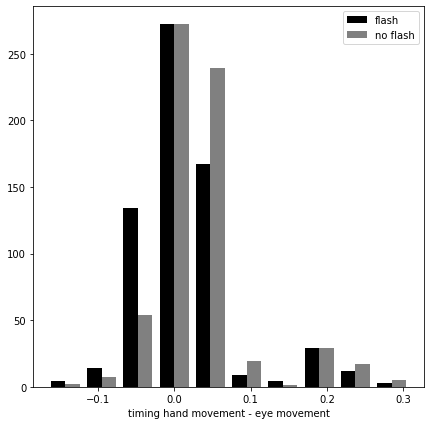

In [8]:
# Ok, this suggests that there might be a stronger difference in the occualar reaction times than in the manual 
# reaction times. That should have an influence on the relative timing between eye and hand movement onset

# let's have a look at this difference
df['hand_eyes'] = df.flash_movement - df.flash_saccade

# negative values indicate that the hand movement occured earlier than the eye movement
fig3, axs3 = plt.subplots(1,1, figsize = (7,7), sharex = True, sharey = True)
colors = ['black','grey']
axs3.hist([df.hand_eyes[df.flash == 1],df.hand_eyes[df.flash == 0]], color = colors, label = ['flash', 'no flash'])
axs3.set_xlabel('timing hand movement - eye movement')
axs3.legend()

plt.savefig('../3_Figures/2Dot_10deg_110ms_Hand_Eye_Onset_Distributions.png')

In [9]:
## Print the mean values of this difference

mean_f = np.mean(df.hand_eyes[df.flash == 1])
mean_nf = np.mean(df.hand_eyes[df.flash == 0])

print('The mean delay with flash between hand and eye movement was {} s\nThe mean delay without flash was {} s'.format(np.round(mean_f,3),np.round(mean_nf,3)))


The mean delay with flash between hand and eye movement was 0.016 s
The mean delay without flash was 0.032 s


In [10]:
# There are clearly differences in the eye movement timing that show in the relation between eye and hand movements. 
# However, it is not clear if we really see a difference in flash and no flash trials for hand movements, to lets test that formally

flash_trials = df[df.flash == 1]['rea_time']
no_flash_trials = df[df.flash == 0]['rea_time']

print(len(flash_trials))
print(len(no_flash_trials))

stats.ks_2samp(flash_trials,no_flash_trials)

649
645


Ks_2sampResult(statistic=0.047106460744616045, pvalue=0.4496012964145477)

Conclusion: we find no evidence for manual freezing in the response times. However, it could be that the flash nevertheless influences the response. Either, it might be that the duration of the movement is influenced, such that the movement is slowed down due to the flash.

We might also expect to see a difference between flash and no-flash trials when we are looking at the end point of the reach movement. Because the movement is executed later than the eye movement, it might be less accurate.

But first, we will analyse the movement duration.

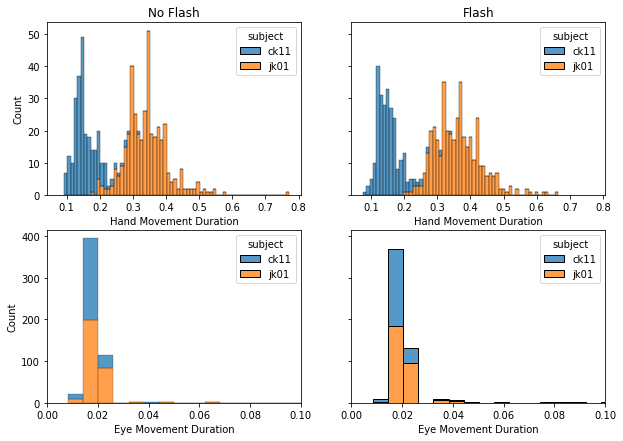

In [11]:
fig4, axs4 = plt.subplots(2,2, figsize = (10,7), sharex = 'row', sharey = 'row')

# the hand movement duration
sns.histplot(data = df[df.flash == 0], x = 'mov_time', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs4[0,0]);
#axs4[0,0].hist(df[df.flash == 0]['mov_time'], color = 'orange')
axs4[0,0].set_title('No Flash')
axs4[0,0].set_xlabel('Hand Movement Duration')
sns.histplot(data = df[df.flash == 1], x = 'mov_time', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs4[0,1]);
#axs4[0,1].hist(df[df.flash == 1]['mov_time'], color = 'orange')
axs4[0,1].set_title('Flash')
axs4[0,1].set_xlabel('Hand Movement Duration')


# the eye movement duration
# determine the bin width (i want a high resoution between 0 and 0.1 s, so I want a binwidth of 0.02)
bw = 0.01
bins = np.arange(min(df[df.flash == 1]['sacc_dur']), max(df[df.flash == 1]['sacc_dur']) + bw, bw)

#axs4[1,0].hist(df[df.flash == 0]['sacc_dur'], color = 'green', bins = bins)
sns.histplot(data = df[df.flash == 0], x = 'sacc_dur', hue = 'subject', multiple = "stack", binwidth = 0.006, ax = axs4[1,0]);
axs4[1,0].set_xlim(0.0,0.1)
axs4[1,0].set_xlabel('Eye Movement Duration')
#axs4[1,1].hist(df[df.flash == 1]['sacc_dur'], color = 'green', bins = bins)
sns.histplot(data = df[df.flash == 1], x = 'sacc_dur', hue = 'subject', multiple = "stack", binwidth = 0.006, ax = axs4[1,1]);
axs4[1,1].set_xlim(0.0,0.1)
axs4[1,1].set_xlabel('Eye Movement Duration');

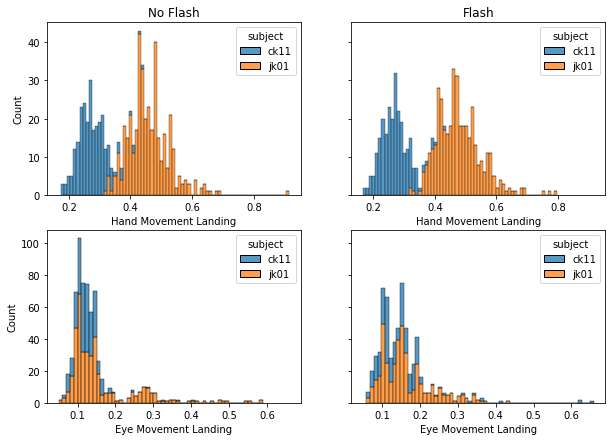

In [12]:
# Ok, that looks like there is no difference in the duration. As a final check, 
# we will look at the landing times relative to the flash

df['flash_movEnd'] = df.t_movEnd - df.t_flash
df['flash_saccEnd'] = df.t_saccEnd - df.t_flash

fig5, axs5 = plt.subplots(2,2, figsize = (10,7), sharex = 'row', sharey = 'row')

# the hand movement duration
#axs5[0,0].hist(df[df.flash == 0]['flash_movEnd'], color = 'orange')
sns.histplot(data = df[df.flash == 0], x = 'flash_movEnd', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs5[0,0]);
axs5[0,0].set_title('No Flash')
axs5[0,0].set_xlabel('Hand Movement Landing')
#axs5[0,1].hist(df[df.flash == 1]['flash_movEnd'], color = 'orange')
sns.histplot(data = df[df.flash == 1], x = 'flash_movEnd', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs5[0,1]);
axs5[0,1].set_title('Flash')
axs5[0,1].set_xlabel('Hand Movement Landing')


# the eye movement duration
# determine the bin width (i want a high resoution between 0 and 0.1 s, so I want a binwidth of 0.02)
bw = 0.05
bins = np.arange(min(df[df.flash == 1]['flash_saccEnd']), max(df[df.flash == 1]['flash_saccEnd']) + bw, bw)

#axs5[1,0].hist(df[df.flash == 0]['flash_saccEnd'], color = 'green', bins = bins)
sns.histplot(data = df[df.flash == 0], x = 'flash_saccEnd', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs5[1,0]);
axs5[1,0].set_xlabel('Eye Movement Landing')
#axs5[1,1].hist(df[df.flash == 1]['flash_saccEnd'], color = 'green', bins = bins)
sns.histplot(data = df[df.flash == 1], x = 'flash_saccEnd', hue = 'subject', multiple = "stack", binwidth = 0.01, ax = axs5[1,1]);
axs5[1,1].set_xlabel('Eye Movement Landing');

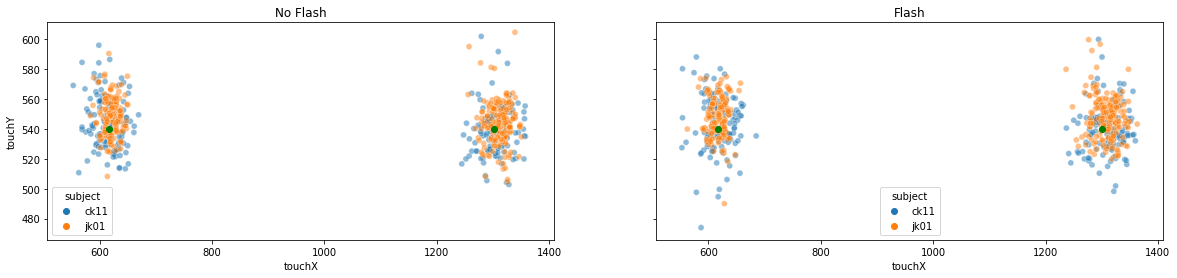

In [13]:
# Still, we don't see that landing time differs between the conditions. So we move on.
# If the hand movement is not affected by the flash, but the eye movement is, 
# we might see that the end points where the hand lands is less accurate in flash trials. 
# Why would that be? Because the eyes haven't looked there yet and therefore, we have only peripheral information

# plot the landing points of all movements
fig6, axs6 = plt.subplots(1,2, figsize = (20,4), sharex=True, sharey=True)

sns.scatterplot(data = df[df.flash == 0], x = 'touchX', y = 'touchY', hue = 'subject', ax = axs6[0], alpha = 0.5);
#axs6[0].scatter(df[df.flash==0].touchX,df[df.flash==0].touchY)
axs6[0].scatter([617,1301],[540,540], color = 'green')
axs6[0].set_title('No Flash')
sns.scatterplot(data = df[df.flash == 1], x = 'touchX', y = 'touchY', hue = 'subject', ax = axs6[1], alpha = 0.5);
#axs6[1].scatter(df[df.flash==1].touchX,df[df.flash==1].touchY)
axs6[1].scatter([617,1301],[540,540], color = 'green')
axs6[1].set_title('Flash');

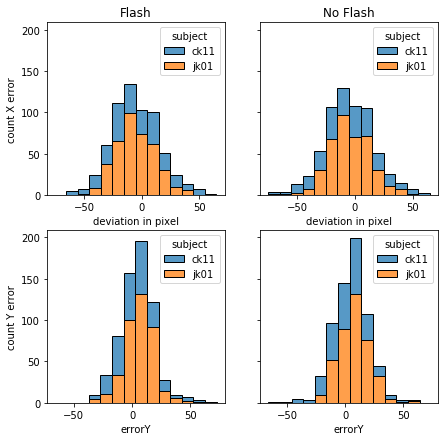

In [14]:
# compute the x and y errors
df['errorX'] = abs(df.touchX - 960) - 350
df['errorY'] = df.touchY - 540

fig7, axs7 = plt.subplots(2,2, figsize = (7,7), sharex = 'row', sharey = True)
#axs7[0,0].hist(df[df.flash == 0].errorX)
sns.histplot(data = df[df.flash == 0], x = 'errorX', hue = 'subject', ax = axs7[0,0], binwidth = 10, multiple = 'stack');
axs7[0,0].set_title('Flash')
axs7[0,0].set_xlabel('deviation in pixel')
axs7[0,0].set_ylabel('count X error')
#axs7[0,1].hist(df[df.flash == 1].errorX)
sns.histplot(data = df[df.flash == 1], x = 'errorX', hue = 'subject', ax = axs7[0,1], binwidth = 10, multiple = 'stack');
axs7[0,1].set_title('No Flash')
axs7[0,1].set_xlabel('deviation in pixel')
axs7[1,0].set_ylabel('count Y error')
#axs7[1,0].hist(df[df.flash == 0].errorY)
sns.histplot(data = df[df.flash == 0], x = 'errorY', hue = 'subject', ax = axs7[1,0], binwidth = 10, multiple = 'stack');
#axs7[1,1].hist(df[df.flash == 1].errorY);
sns.histplot(data = df[df.flash == 1], x = 'errorY', hue = 'subject', ax = axs7[1,1], binwidth = 10, multiple = 'stack');

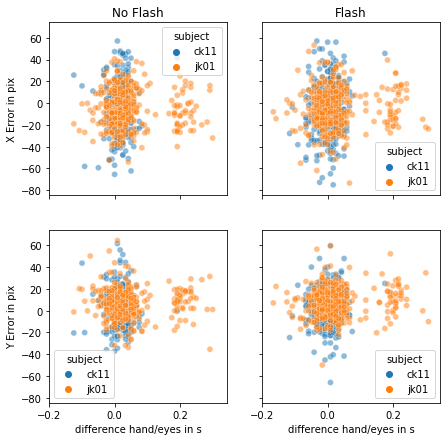

In [15]:
# plot the error as a function of saccade-hand offset

fig8, axs8 = plt.subplots(2,2, figsize = (7,7), sharex = True, sharey = True)
axs8[0,0].set_title('No Flash')
axs8[0,0].set_ylabel('X Error in pix')

sns.scatterplot(data = df[df.flash == 0], x = 'hand_eyes', y = 'errorX', hue = 'subject', ax = axs8[0,0], alpha = 0.5);
#axs8[0,0].scatter(df.hand_eyes[df.flash == 0],df.errorX[df.flash == 0])
axs8[0,1].set_title('Flash')
sns.scatterplot(data = df[df.flash == 1], x = 'hand_eyes', y = 'errorX', hue = 'subject', ax = axs8[0,1], alpha = 0.5);
#axs8[0,1].scatter(df.hand_eyes[df.flash == 1],df.errorX[df.flash == 1])

#axs8[1,0].scatter(df.hand_eyes[df.flash == 0],df.errorY[df.flash == 0])
sns.scatterplot(data = df[df.flash == 0], x = 'hand_eyes', y = 'errorY', hue = 'subject', ax = axs8[1,0], alpha = 0.5);
axs8[1,0].set_ylabel('Y Error in pix')
axs8[1,0].set_xlabel('difference hand/eyes in s')
sns.scatterplot(data = df[df.flash == 1], x = 'hand_eyes', y = 'errorY', hue = 'subject', ax = axs8[1,1], alpha = 0.5);
#axs8[1,1].scatter(df.hand_eyes[df.flash == 1],df.errorY[df.flash == 1])
axs8[1,1].set_xlabel('difference hand/eyes in s');

It also seems like there is no effect of the flash on the final position of the hand movement.

#### Version 2 of the Experiment: target displacement with flash



In [16]:
data_v2 = pd.read_csv('../1_Data/ck12_MI_dat.csv')
design_v2 = pd.read_csv('../1_Design/ck12_MI_des.csv')

design_v2.sort_values('id', inplace = True)
design_v2.reset_index(drop = True, inplace = True)

design_v2.drop(['id', 'gapDur'], axis = 1, inplace = True)
data_v2.drop(['id', 'clean_rea', 't_start', 'initPixx', 't1_draw', 'version', 't_handfixed', 't_eyesfixed', 't_bothfixed', 't_feedback', 't_end', 'mean_rt', 'gapDur'], axis = 1, inplace = True)

df_v2 = pd.concat([data_v2,design_v2], axis = 1)
df_v2.drop(np.where(df_v2.success == 0)[0], axis = 0, inplace = True)
df_v2


,success,rea_time,mov_time,sacc_rea,sacc_dur,t2_draw,t_flash,t_movStart,t_movEnd,t_saccStart,t_saccEnd,touchX,touchY,flash,tar2xPos,tar2yPos,tar3xPos,tar3yPos,fixDur,shift
0,1,0.191946,0.108720,0.174934,0.018227,21497.236765,21497.336727,21497.428711,21497.537430,21497.411698,21497.429926,1352.513717,541.090729,1,10,540,9.5,540,0.619200,1
1,1,0.183236,0.142044,0.191715,0.016533,21501.236926,21501.295071,21501.420162,21501.562206,21501.428641,21501.445174,639.487909,574.139812,1,-10,540,-9.5,540,0.522549,1
2,1,0.166807,0.108577,0.158351,0.016694,21505.111756,21505.211792,21505.278563,21505.387140,21505.270107,21505.286801,1286.453973,507.714427,0,10,540,9.5,540,0.610006,0
3,1,0.183241,0.133565,0.158270,0.016509,21508.770347,21508.853527,21508.953588,21509.087153,21508.928617,21508.945126,617.992278,536.509668,1,-10,540,-9.5,540,0.561417,0
4,1,0.191891,0.141722,0.166722,0.016713,21512.686811,21512.728526,21512.878703,21513.020425,21512.853533,21512.870246,599.118065,546.326227,0,-10,540,-9.5,540,0.557778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1,0.108325,0.183348,0.141551,0.016624,24906.332451,24906.407285,24906.440776,24906.624124,24906.474001,24906.490625,1245.035562,543.054041,1,10,540,9.5,540,0.554772,0
866,1,0.191851,0.108368,0.141753,0.016671,24910.107265,24910.190655,24910.299116,24910.407484,24910.249018,24910.265688,1318.435277,511.968270,0,10,540,9.5,540,0.701109,1
867,1,0.200088,0.133413,0.216654,0.016727,24913.915710,24913.957370,24914.115798,24914.249211,24914.132365,24914.149091,1304.279618,540.763510,1,10,540,9.5,540,0.561759,1
868,1,0.216756,0.158409,0.158441,0.016580,24917.815746,24917.857514,24918.032501,24918.190911,24917.974187,24917.990767,620.613696,530.946951,0,-10,540,-9.5,540,0.719990,0


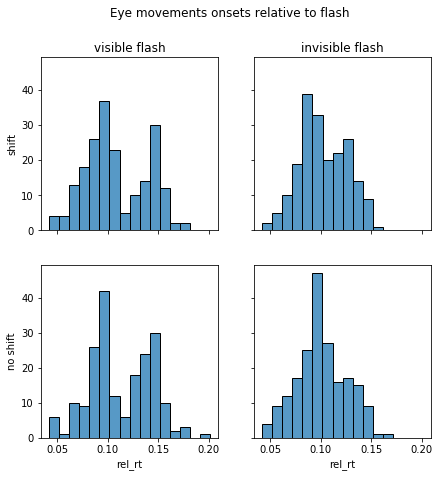

In [17]:
# First, we want to see if there is an occular inhibition in the flash condition, and in the shift condition

fig1, axs1 = plt.subplots(2,2, figsize = (7,7), sharex= True, sharey = True)
fig1.suptitle('Eye movements onsets relative to flash')

df_v2['rel_rt'] = df_v2.t_saccStart - df_v2.t_flash

sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==1)], x = 'rel_rt', ax = axs1[0,0], binwidth = 0.01)
axs1[0,0].set_title('visible flash')
axs1[0,0].set_ylabel('shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==0)], x = 'rel_rt', ax = axs1[0,1], binwidth = 0.01)
axs1[0,1].set_title('invisible flash')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==1)], x = 'rel_rt', ax = axs1[1,0], binwidth = 0.01)
axs1[1,0].set_ylabel('no shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==0)], x = 'rel_rt', ax = axs1[1,1], binwidth = 0.01);

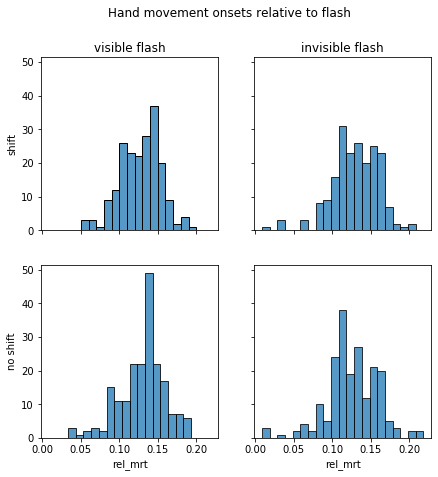

In [18]:
# The same plots for hand movement onset

fig2, axs2 = plt.subplots(2,2, figsize = (7,7), sharex= True, sharey = True)
fig2.suptitle('Hand movement onsets relative to flash')
df_v2['rel_mrt'] = df_v2.t_movStart - df_v2.t_flash

sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==1)], x = 'rel_mrt', ax = axs2[0,0], binwidth = 0.01)
axs2[0,0].set_title('visible flash')
axs2[0,0].set_ylabel('shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==0)], x = 'rel_mrt', ax = axs2[0,1], binwidth = 0.01)
axs2[0,1].set_title('invisible flash')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==1)], x = 'rel_mrt', ax = axs2[1,0], binwidth = 0.01)
axs2[1,0].set_ylabel('no shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==0)], x = 'rel_mrt', ax = axs2[1,1], binwidth = 0.01);

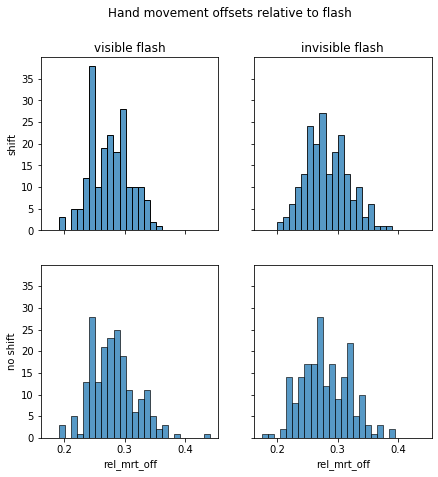

In [19]:
# The same plots for hand movement offset

fig3, axs3 = plt.subplots(2,2, figsize = (7,7), sharex= True, sharey = True)
fig3.suptitle('Hand movement offsets relative to flash')
df_v2['rel_mrt_off'] = df_v2.t_movEnd - df_v2.t_flash

sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==1)], x = 'rel_mrt_off', ax = axs3[0,0], binwidth = 0.01)
axs3[0,0].set_title('visible flash')
axs3[0,0].set_ylabel('shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 1) & (df_v2['flash']==0)], x = 'rel_mrt_off', ax = axs3[0,1], binwidth = 0.01)
axs3[0,1].set_title('invisible flash')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==1)], x = 'rel_mrt_off', ax = axs3[1,0], binwidth = 0.01)
axs3[1,0].set_ylabel('no shift')
sns.histplot(data = df_v2[(df_v2['shift'] == 0) & (df_v2['flash']==0)], x = 'rel_mrt_off', ax = axs3[1,1], binwidth = 0.01);

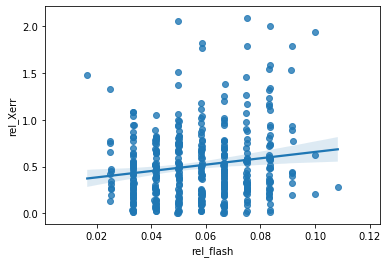

In [20]:
# Next, we will analyze the error with respect to the second target.
# We assume that the error should will be smaller, the earlier the target was presented.

# The correct x position of the shifted target is +/- 325.7560 + 960
# 1286
# 634

# compute the relative x error
scr_Xcenter = 960 # screen center
rel_tarX    = 326 # target position relative to screen center
ppd         = 34.3 # visual pixel per degree
df_v2['rel_Xerr']  = abs((abs(df_v2.touchX - scr_Xcenter) - rel_tarX)/ppd)
df_v2['rel_flash'] = df_v2.t_flash - df_v2.t2_draw

# analysis 1 - does the error get smaller when the flash came on earlier
# take only trials with a shift
df_shift = df_v2[df_v2['shift']==1]

sns.regplot(data=df_shift, x = 'rel_flash', y = 'rel_Xerr', logistic = False, order = 1);

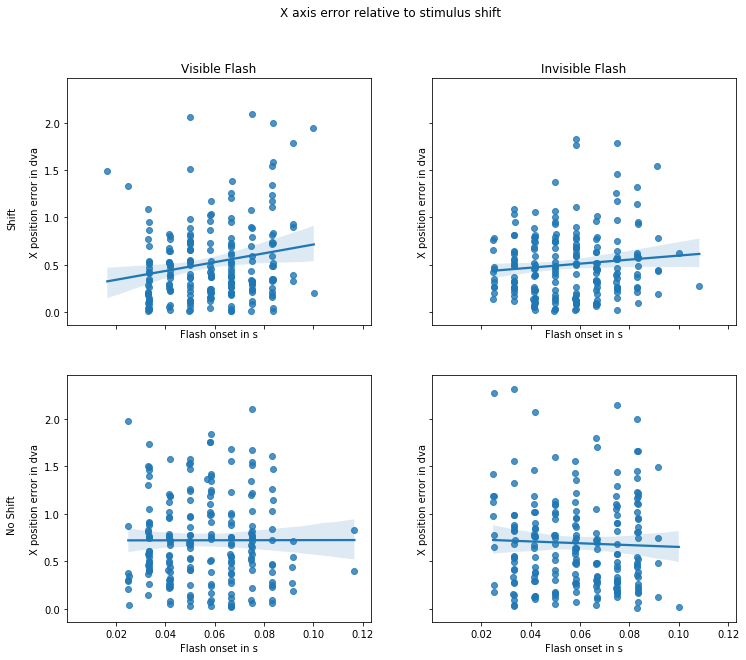

In [21]:
# looks okayish, let's see if there's a difference between flash and no flash versions of this
fig4, axs4 = plt.subplots(2,2, figsize=(12,10), sharex = True, sharey = True)
fig4.suptitle('X axis error relative to stimulus shift')

sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 1)], x = 'rel_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs4[0,0])
axs4[0,0].set_title('Visible Flash')
axs4[0,0].set_ylabel('X position error in dva')
axs4[0,0].text(-0.02,1, "Shift", va = 'center', ha = 'right', rotation=90)
axs4[0,0].set_xlabel('Flash onset in s');
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 1)], x = 'rel_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs4[0,1])
axs4[0,1].set_title('Invisible Flash')
axs4[0,1].set_xlabel('Flash onset in s')
axs4[0,1].set_ylabel('X position error in dva')
sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 0)], x = 'rel_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs4[1,0])
axs4[1,0].set_ylabel('X position error in dva')
axs4[1,0].text(-0.02,1, "No Shift", va = 'center', ha = 'right', rotation=90)
axs4[1,0].set_xlabel('Flash onset in s')
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 0)], x = 'rel_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs4[1,1])
axs4[1,1].set_xlabel('Flash onset in s')
axs4[1,1].set_ylabel('X position error in dva');

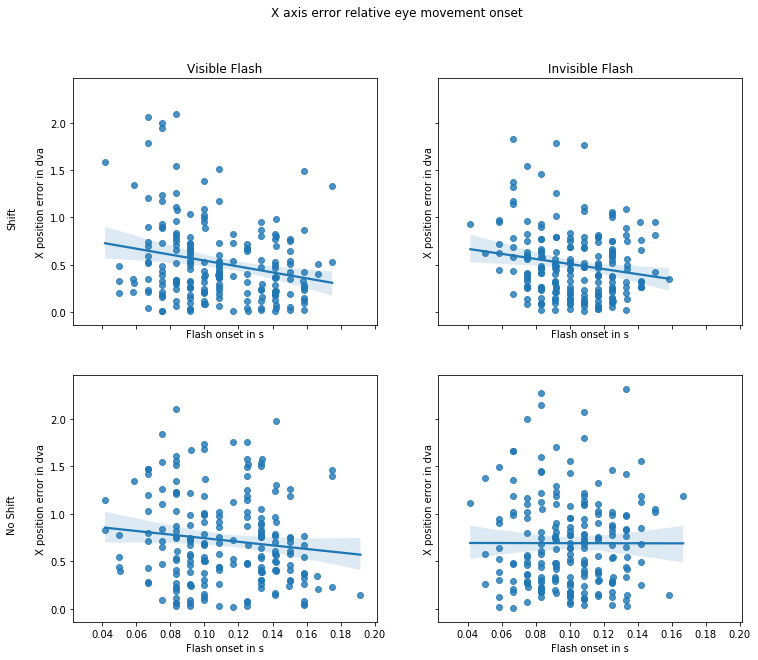

In [22]:
# lets do the same analysis eye-movement onset locked
fig5, axs5 = plt.subplots(2,2, figsize=(12,10), sharex = True, sharey = True)
fig5.suptitle('X axis error relative eye movement onset')

# set the flash time relative to saccade onset
df_v2['sacc_flash'] = df_v2.t_saccStart - df_v2.t_flash 

sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 1)], x = 'sacc_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs5[0,0])
axs5[0,0].set_title('Visible Flash')
axs5[0,0].set_ylabel('X position error in dva')
axs5[0,0].text(-0.01,1, "Shift", va = 'center', ha = 'right', rotation=90)
axs5[0,0].set_xlabel('Flash onset in s');
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 1)], x = 'sacc_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs5[0,1])
axs5[0,1].set_title('Invisible Flash')
axs5[0,1].set_xlabel('Flash onset in s')
axs5[0,1].set_ylabel('X position error in dva')
sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 0)], x = 'sacc_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs5[1,0])
axs5[1,0].set_ylabel('X position error in dva')
axs5[1,0].text(-0.01,1, "No Shift", va = 'center', ha = 'right', rotation=90)
axs5[1,0].set_xlabel('Flash onset in s')
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 0)], x = 'sacc_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs5[1,1])
axs5[1,1].set_xlabel('Flash onset in s')
axs5[1,1].set_ylabel('X position error in dva');

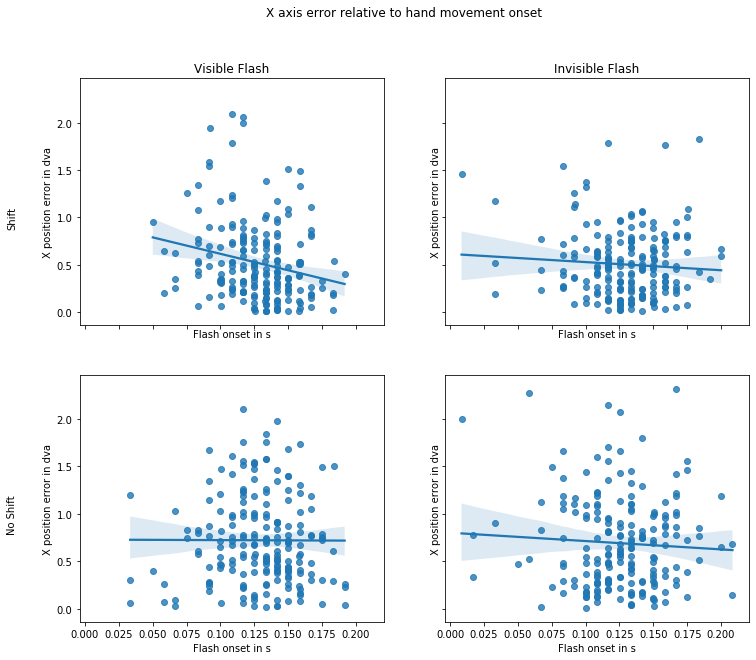

In [23]:
# lets do the same analysis hand-movement onset locked
fig6, axs6 = plt.subplots(2,2, figsize=(12,10), sharex = True, sharey = True)
fig6.suptitle('X axis error relative to hand movement onset')

# set the flash time relative to saccade onset
df_v2['mov_flash'] = df_v2.t_movStart - df_v2.t_flash 

sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 1)], x = 'mov_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs6[0,0])
axs6[0,0].set_title('Visible Flash')
axs6[0,0].set_ylabel('X position error in dva')
axs6[0,0].text(-0.05,1, "Shift", va = 'center', ha = 'right', rotation=90)
axs6[0,0].set_xlabel('Flash onset in s');
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 1)], x = 'mov_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs6[0,1])
axs6[0,1].set_title('Invisible Flash')
axs6[0,1].set_xlabel('Flash onset in s')
axs6[0,1].set_ylabel('X position error in dva')
sns.regplot(data=df_v2[(df_v2.flash == 1)&(df_v2['shift'] == 0)], x = 'mov_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs6[1,0])
axs6[1,0].set_ylabel('X position error in dva')
axs6[1,0].text(-0.05,1, "No Shift", va = 'center', ha = 'right', rotation=90)
axs6[1,0].set_xlabel('Flash onset in s')
sns.regplot(data=df_v2[(df_v2.flash == 0)&(df_v2['shift'] == 0)], x = 'mov_flash', y = 'rel_Xerr', logistic = False, order = 1, ax = axs6[1,1])
axs6[1,1].set_xlabel('Flash onset in s')
axs6[1,1].set_ylabel('X position error in dva');